In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
data = pd.read_csv('breast_cancer.csv')
data.shape

(569, 33)

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Defining X axis as all columns with column name ending with mean
# Defining Y axis as diagonis
X = data[[col for col in list(data)[2:] if col.endswith('mean')]]
y = data.iloc[:,1]

# Mapping numeric number to diagnosis column
y = y.map({'M':0,'B':1})

In [5]:
X.isnull().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.0,0.997855,0.987357,0.0,0.0,0.000000,0.000000,0.0,0.0
texture_mean,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
perimeter_mean,0.997855,0.0,1.000000,0.986507,0.0,0.0,0.000000,0.000000,0.0,0.0
area_mean,0.987357,0.0,0.986507,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
smoothness_mean,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0
compactness_mean,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0
concavity_mean,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.921391,0.0,0.0
concave points_mean,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.921391,1.000000,0.0,0.0
symmetry_mean,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0
fractal_dimension_mean,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0


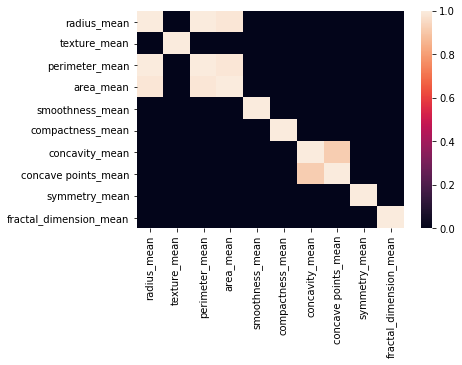

In [6]:
# check redundant features using correlation heatmap
sn.heatmap(X.corr().applymap(lambda x : x if x > 0.9 else 0))

X.corr().applymap(lambda x : x if x > 0.9 else 0)

In [7]:
# from above heat map diagram radius_mean, area_mean and perimeter_mean are higly correlated so we use one of them.
# Using radius_mean only
X.drop(['area_mean','perimeter_mean'],axis=1,inplace=True)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [10]:
# Create Training data for Single test using tts
X_train,X_test,y_train,y_test = tts(X,y,random_state=23,test_size=0.25)

In [11]:
# instantiate Knn model , default n_neighbors is 5
knn = KNeighborsClassifier()

In [12]:
#feed train data to knn model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
# predict data for test data
y_predicted = knn.predict(X_test)

In [14]:
# Evaluate knn model by feeding test data
knn.score(X_test,y_test)

0.8881118881118881

In [15]:
# accuracy score of single test of given model 
print(f'accuracy score     : {accuracy_score(y_test,y_predicted)}')
# accuracy r2_score of single test of given model 
print(f'r2_score           : {r2_score(y_test,y_predicted)}')
# accuracy mean_squared_error of single test of given model 
print(f'mean_squared_error : {mean_squared_error(y_test,y_predicted)}')

accuracy score     : 0.8881118881118881
r2_score           : 0.4982456140350876
mean_squared_error : 0.11188811188811189


In [16]:
# k-fold Cross-Validation
# cv = For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. 
# In all other cases, KFold is used.
#  cv = Node then kfold = 5
cross_val = cross_val_score(knn,X,y,cv=10)
print(f'Maximum cross val socre is : {max(cross_val)}')
print(f'Minumum cross val socre is : {min(cross_val)}')

Maximum cross val socre is : 0.9298245614035088
Minumum cross val socre is : 0.8245614035087719


In [17]:
params = {"n_neighbors":np.arange(1,10,1), "metric":["euclidean", "minkowski", "jaccard", "cosine"]}

In [18]:
# cv = For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. 
# In all other cases, KFold is used.
#  cv = Node then kfold = 5
knn_gscv = GridSearchCV(knn,param_grid=params,cv=10)

In [19]:
# feed data to GridSearchCV
knn_gscv.fit(X,y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'metric': ['euclidean', 'minkowski', 'jaccard', 'cosine']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
# best score
knn_gscv.best_score_

0.8804920913884007

In [21]:
# best estimator (model with parameters)
knn_gscv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [22]:
# best index
knn_gscv.best_index_

6

In [23]:
knn_gscv.n_splits_

10

In [24]:
# Scale the values so that model takes less time for omuputation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [26]:
from sklearn.neighbors import kneighbors_graph as knn_graph